In [3]:
import pandas as pd

import utils
import numpy as np
import tensorflow as tf
from Code import evaluations
from Code import classifiers

In [4]:
df5s, df10s, _ = utils.task4_df()
df5s.head()

,TrackID,zero_cross_rate_mean,zero_cross_rate_std,rmse_mean,rmse_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_rolloff_mean,...,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,GenreID,Type
0,0,0.145551,0.037451,0.201554,0.028688,2863.732015,452.584007,2740.471436,295.500065,6102.519735,...,9.127838,7.975465,9.560179,6.904463,6.030449,6.004714,5.124403,5.069015,0,Train
1,0,0.142183,0.042302,0.202032,0.037592,2858.830340,480.446371,2758.699446,267.730197,6054.369100,...,8.579168,8.547901,11.050330,6.610333,6.590199,6.881006,6.699643,4.862863,0,Train
2,0,0.166341,0.083240,0.187266,0.060414,2935.345104,778.992798,2688.226929,358.842715,6015.788778,...,11.316814,9.722525,9.740349,9.699237,7.311144,8.129169,7.800745,8.989029,0,Train
3,0,0.102537,0.031382,0.240589,0.082133,2150.429917,587.897056,2307.956715,536.214859,4455.628459,...,12.747808,11.336458,9.053881,7.538171,7.355865,7.754859,6.869428,6.607519,0,Train
4,0,0.114493,0.028725,0.296563,0.036956,2310.485194,414.426753,2456.257031,357.768598,4768.707275,...,10.998959,6.845205,9.098332,7.634520,6.579967,7.381236,6.205094,6.591112,0,Train


In [3]:
models = classifiers.build_ensemble_lstm(df5s, nmodels=10)
_, _, x_test, y_test = utils.preproccess_for_lstm(df5s)

Training model 1
Training model 2
Training model 3
Training model 4
Training model 5
Training model 6
Training model 7
Training model 8
Training model 9
Training model 10


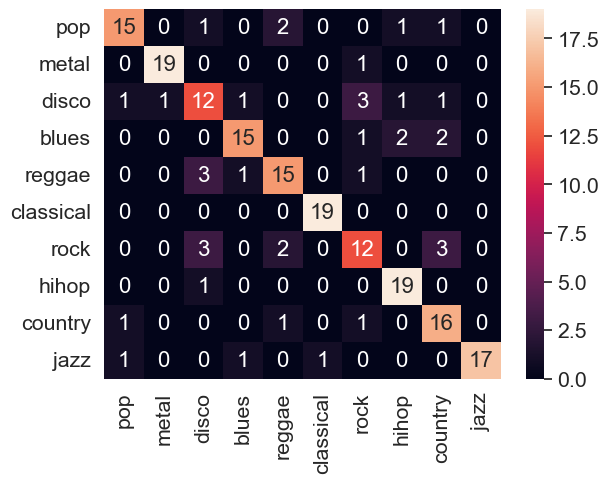

Accuracy : 0.803030303030303
Macro F1 score : 0.8033235569220881
Individual accuracies : 
combined    0.803030
0           0.782828
4           0.777778
6           0.772727
mean        0.769054
9           0.767677
1           0.762626
3           0.762626
8           0.762626
2           0.757576
5           0.757576
7           0.752525
Name: accuracies, dtype: float64


,tp,tn,fp,fn,F1Score
pop,15,175,3,5,0.789474
metal,19,177,1,1,0.950000
disco,12,170,8,8,0.600000
blues,15,175,3,5,0.789474
reggae,15,173,5,5,0.750000
classical,19,178,1,0,0.974359
rock,12,171,7,8,0.615385
hihop,19,174,4,1,0.883721
country,16,172,7,3,0.761905
jazz,17,178,0,3,0.918919


In [6]:
ensemble_prediction = classifiers.predict_ensemble_lstm(x_test, models)
models_accuracies, predictor_perf = evaluations.evaluate_ensemble_lstm(ensemble_prediction, y_test)
print(
      f"Accuracy : {models_accuracies['combined']}\n"
      f"Macro F1 score : {predictor_perf.F1Score.mean()}\n"
      f"Individual accuracies : \n{models_accuracies}\n"
)
predictor_perf